# Introduction to Linear Regression



In [1]:
# this allows plots to appear directly in the notebook
%matplotlib inline

# Import the libraries required
import pandas as pd
import matplotlib.pyplot as mp
import sklearn.linear_model as slm


In [4]:
# Read in data
house_data = pd.read_csv("c:/users/mohds/SYD_DAT_5/labs/Week 3/chicagohouseprices2.csv")
# house_data = pd.read_csv("SYD_DAT_5/labs/Week 3/chicagohouseprices2.csv", index_col=0)
house_data

,Unnamed: 0,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
0,0,"2111 W Division St #5, Chicago IL",Wicker Park,Condo,390000,NaN,2.59,9,3.91,0,0,0,36.2,335790.0
1,1,"1520 W Walton St #2, Chicago IL",Wicker Park,Condo,320500,NaN,4.10,7,3.02,0,0,0,91.7,376908.0
2,2,"2047 W Thomas St, Chicago IL",Wicker Park,Multi-Family Home,620000,4.0,2.09,9,3.84,94,3049,3492,36.2,629300.0
3,3,"1735 N Paulina St #314, Chicago IL",Wicker Park,Condo,318000,NaN,2.40,9,2.90,0,0,0,50.0,297330.0
4,4,"1634 W Beach Ave, Chicago IL",Wicker Park,Multi-Family Home,477000,2.0,4.63,9,2.96,31,2614,1840,78.9,463644.0
5,5,"1634 W Wabansia Ave, Chicago IL",Wicker Park,Single-Family Home,695000,2.0,1.40,8,2.86,23,2614,1628,50.0,813150.0
6,6,"1440 N Wood St #2F, Chicago IL",Wicker Park,Condo,242500,NaN,5.38,9,3.22,0,0,0,69.4,196667.5
7,7,"1137 N Wood St #F2, Chicago IL",Wicker Park,Condo,477500,NaN,4.18,8,3.39,0,0,0,59.5,445030.0
8,8,"1418 N Bell Ave, Chicago IL",Wicker Park,Multi-Family Home,466000,2.0,4.93,10,4.02,121,3049,1344,16.7,538696.0
9,9,"1308 N Bosworth Ave, Chicago IL",Wicker Park,Multi-Family Home,435000,2.0,4.75,8,2.89,119,3485,1760,40.0,463275.0


In [5]:
# Summarise the data
house_data.describe()

,Unnamed: 0,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
count,219.000000,2.190000e+02,70.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,2.190000e+02
mean,109.000000,4.834311e+05,2.271429,4.663607,9.698630,3.420411,29.424658,873.200913,699.977169,49.197717,4.862191e+05
std,63.364028,4.001249e+05,0.883364,1.418146,2.898995,0.352522,49.155880,1392.893683,1175.278922,18.554525,3.978582e+05
min,0.000000,2.450000e+04,1.000000,1.090000,6.000000,2.770000,0.000000,0.000000,0.000000,16.700000,2.883650e+04
25%,54.500000,3.190000e+05,2.000000,3.940000,8.000000,3.150000,0.000000,0.000000,0.000000,36.100000,3.074488e+05
50%,109.000000,3.900000e+05,2.000000,4.930000,9.000000,3.400000,0.000000,0.000000,0.000000,50.000000,3.919800e+05
75%,163.500000,5.125000e+05,3.000000,5.580000,10.000000,3.685000,41.000000,2614.000000,1344.000000,59.500000,5.324750e+05
max,218.000000,3.686000e+06,4.000000,8.080000,22.000000,4.200000,131.000000,7405.000000,6422.000000,93.900000,3.973508e+06


In [6]:
# Look for any linear correlations in the data - the bigger the number the better ordinary least squares will do
house_data.corr()

,Unnamed: 0,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
Unnamed: 0,1.000000,-0.053697,-0.051432,-0.014677,0.067399,0.114595,-0.149508,-0.205440,-0.220886,-0.003468,-0.061094
Price,-0.053697,1.000000,0.113943,0.118667,-0.034644,-0.072433,0.237720,0.443341,0.456272,-0.072403,0.983784
Bath,-0.051432,0.113943,1.000000,0.163785,0.166330,-0.157517,-0.039220,-0.029979,0.698526,-0.047992,0.105632
CrimeIndex,-0.014677,0.118667,0.163785,1.000000,0.194745,0.102382,-0.036644,-0.008807,0.070952,-0.100256,0.122793
MinutesToLoop,0.067399,-0.034644,0.166330,0.194745,1.000000,0.374829,-0.023820,-0.053292,-0.032437,-0.196728,-0.034185
MilesToLake,0.114595,-0.072433,-0.157517,0.102382,0.374829,1.000000,-0.047087,0.006240,-0.046517,-0.205966,-0.082604
Age,-0.149508,0.237720,-0.039220,-0.036644,-0.023820,-0.047087,1.000000,0.716774,0.645147,-0.029953,0.255628
LotSizeSqft,-0.205440,0.443341,-0.029979,-0.008807,-0.053292,0.006240,0.716774,1.000000,0.828598,-0.055458,0.454939
HouseSizeSqft,-0.220886,0.456272,0.698526,0.070952,-0.032437,-0.046517,0.645147,0.828598,1.000000,-0.023378,0.471783
SchoolIndex,-0.003468,-0.072403,-0.047992,-0.100256,-0.196728,-0.205966,-0.029953,-0.055458,-0.023378,1.000000,-0.073825


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A4E74E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011BC47F0>]], dtype=object)

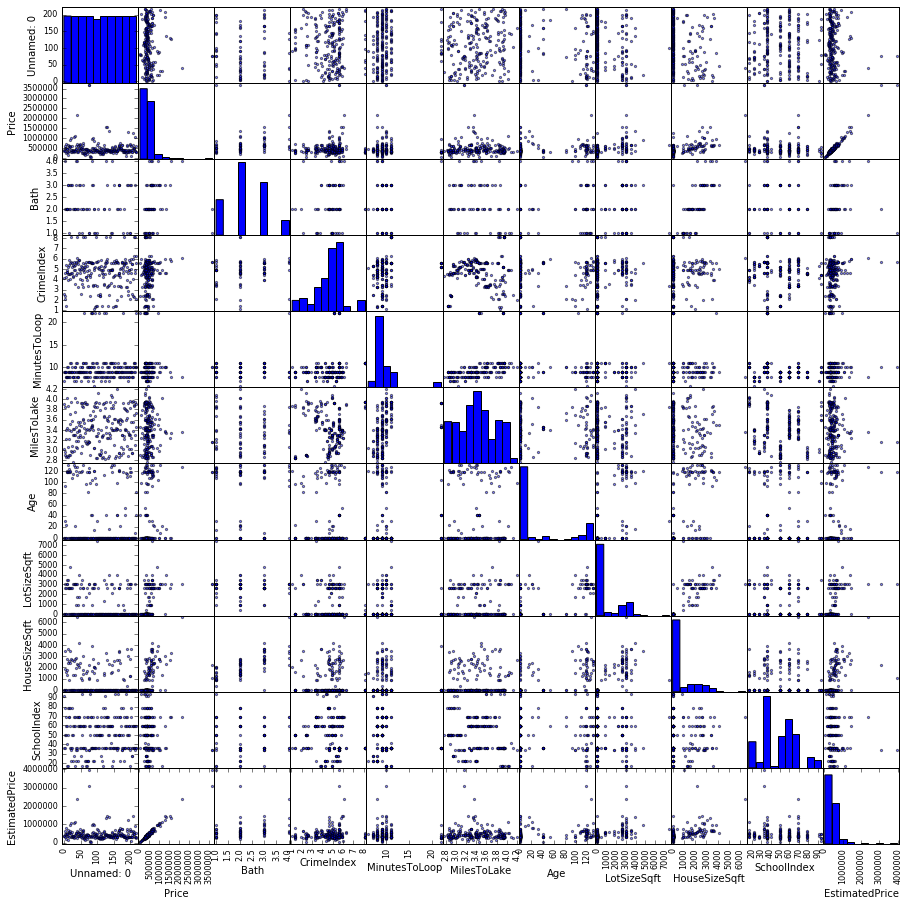

In [7]:
pd.scatter_matrix(house_data, figsize=(15,15))

### Questions?

- Can you describe the data set - give a summary of what's happening?
- What looks to be affecting house prices from our initial inspection?
- What is the type of relationship in those variables affecting price?

In [20]:
# create a dataframe with just the estimated price column in it
estimated_price = house_data.loc[:,'EstimatedPrice'].reshape(-1,1)
# estimated_price = house_data.EstimatedPrice

In [21]:
# create a RANSAC regressor
regressor = slm.RANSACRegressor()

In [22]:
# use the RANSAC regressor to find how much of the Price is related to the EstimatedPrice
house_price = house_data.Price.reshape(-1,1)
house_price
regressor.fit(house_price, estimated_price)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [23]:
# use that regression to predict Price based on EstimatedPrice
prediction_house_price = regressor.predict(estimated_price)

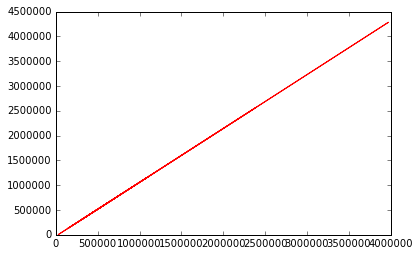

In [46]:
# draw a scatter plot of Price / EstimatedPrice and overlay the RANSAC prediction on it
mp.plot(house_data.EstimatedPrice, prediction_house_price, color = 'red')

In [33]:
# RANSAC has an attribute called 'estimator'. What type is it?
regressor.estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
# What is the coefficient (gradient) and y-intercept as reported by this estimator (hint: coef_ and intercept_)
# regressor.estimator_.coef_
regressor.estimator_.intercept_

array([-35537.08331444])

In [64]:
# Create a new data frame with two columns: HouseSizeSqft and Bath
no_bath = house_data.fillna(0)
size_and_bath = no_bath.loc[:, ['Bath', 'HouseSizeSqft']]

In [65]:
# Regress Price against these values
regressor.fit(size_and_bath, house_price)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [91]:
# What would you expect a house price to be for a house with 3 bathrooms and 3500 sqft?
regressor.predict([[3, 3500]])

array([[ 653645.53822039]])

In [73]:
# Can you find any houses in the data set which are similar to this?
no_bath[(no_bath.Bath == 3) & (no_bath.HouseSizeSqft > 3499)]

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
13,"2116 W Potomac Ave, Chicago IL",Wicker Park,Multi-Family Home,650000,3.0,3.89,10,3.86,119,3485,3618,16.7,680550.0
45,"1237 N Wolcott Ave, Chicago IL",Wicker Park,Multi-Family Home,647500,3.0,4.99,9,3.49,119,3920,4125,59.5,530950.0
190,"1422 N Hoyne Ave #1, Chicago IL",Wicker Park,Multi-Family Home,624000,3.0,3.89,10,3.76,109,3485,3663,69.4,643344.0
203,"1928 W Crystal St, Chicago IL",Wicker Park,Multi-Family Home,580000,3.0,4.99,9,3.56,119,3049,3612,59.5,657140.0


In [80]:
# Try selecting different variables or combinations of variables or another regressor.
age_and_lot = no_bath.loc[:, ['Age', 'LotSizeSqft']]

In [81]:
regressor.fit(age_and_lot, house_price)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [85]:
regressor.predict([[30, 3500]])

array([[ 656233.46573397]])

In [94]:
predicted_price = regressor.predict(age_and_lot)

In [86]:
no_bath[(no_bath.Age >= 30) & (no_bath.LotSizeSqft > 3499)]

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
19,"2152 W Caton St, Chicago IL",Wicker Park,Single-Family Home,885000,3.0,5.58,11,3.72,121,4792,3461,36.1,945180.0
45,"1237 N Wolcott Ave, Chicago IL",Wicker Park,Multi-Family Home,647500,3.0,4.99,9,3.49,119,3920,4125,59.5,530950.0
101,"1236 N Hoyne Ave, Chicago IL",Wicker Park,Single-Family Home,650000,1.0,3.39,11,3.85,31,7405,900,69.4,737750.0
161,"2245 W Cortez St, Chicago IL",Wicker Park,Multi-Family Home,350000,2.0,1.96,10,4.20,99,3920,2652,33.3,307300.0


In [87]:
#(Optional) Can you make a 3D plot to show whether they are effective?
import mpl_toolkits.mplot3d

In [88]:
fig = mp.figure()

In [89]:
ax = fig.add_subplot(111, projection = '3d')

In [95]:
ax.scatter(no_bath.Age, no_bath.LotSizeSqft, predicted_price, color = 'red')

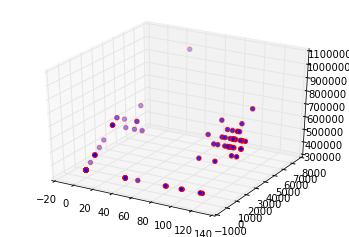

In [96]:
fig